In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from matplotlib.patches import Patch
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import time
import shap
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.feature_selection import mutual_info_regression
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from mrmr import mrmr_regression
from scipy.stats import randint
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from boruta import BorutaPy
import geopandas as gpd
import folium
from folium import Choropleth
from folium import Html
from shapely.geometry import Point
import os
from scipy.linalg import pinv
from mpl_toolkits.mplot3d import Axes3D

In [4]:
df = pd.read_csv("deprem_senaryosu.csv", encoding="ISO-8859-9", delimiter=";")

In [ ]:
df.head(3)

,ilce_adi,mahalle_adi,cok_agir_hasarli_bina_sayisi,agir_hasarli_bina_sayisi,orta_hasarli_bina_sayisi,hafif_hasarli_bina_sayisi,can_kaybi_sayisi,agir_yarali_sayisi,hastanede_tedavi_sayisi,hafif_yarali_sayisi,dogalgaz_boru_hasari,icme_suyu_boru_hasari,atik_su_boru_hasari,gecici_barinma
0,ADALAR,BURGAZADA,54,99,256,241,8,6,24,42,0,0,1,398
1,ADALAR,HEYBELİADA,101,175,423,393,25,21,66,113,1,1,2,763
2,ADALAR,KINALIADA,53,97,287,302,5,3,15,27,0,1,1,420


In [ ]:
df.tail(3)

,ilce_adi,mahalle_adi,mahalle_koy_uavt,cok_agir_hasarli_bina_sayisi,agir_hasarli_bina_sayisi,orta_hasarli_bina_sayisi,hafif_hasarli_bina_sayisi,can_kaybi_sayisi,agir_yarali_sayisi,hastanede_tedavi_sayisi,hafif_yarali_sayisi,dogalgaz_boru_hasari,icme_suyu_boru_hasari,atik_su_boru_hasari,gecici_barinma
956,ZEYTİNBURNU,VELİEFENDİ,40836,39,80,309,530,66,38,175,317,1,1,2,3400
957,ZEYTİNBURNU,YENİDOĞAN,40833,17,33,135,234,24,13,63,114,0,0,1,1715
958,ZEYTİNBURNU,YEŞİLTEPE,40835,26,52,211,374,45,25,118,216,0,0,1,4250


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ilce_adi                      959 non-null    object
 1   mahalle_adi                   959 non-null    object
 2   mahalle_koy_uavt              959 non-null    int64 
 3   cok_agir_hasarli_bina_sayisi  959 non-null    int64 
 4   agir_hasarli_bina_sayisi      959 non-null    int64 
 5   orta_hasarli_bina_sayisi      959 non-null    int64 
 6   hafif_hasarli_bina_sayisi     959 non-null    int64 
 7   can_kaybi_sayisi              959 non-null    int64 
 8   agir_yarali_sayisi            959 non-null    int64 
 9   hastanede_tedavi_sayisi       959 non-null    int64 
 10  hafif_yarali_sayisi           959 non-null    int64 
 11  dogalgaz_boru_hasari          959 non-null    int64 
 12  icme_suyu_boru_hasari         959 non-null    int64 
 13  atik_su_boru_hasari 

In [ ]:
df.shape

(959, 15)

In [ ]:
df.columns

Index(['ilce_adi', 'mahalle_adi', 'mahalle_koy_uavt',
       'cok_agir_hasarli_bina_sayisi', 'agir_hasarli_bina_sayisi',
       'orta_hasarli_bina_sayisi', 'hafif_hasarli_bina_sayisi',
       'can_kaybi_sayisi', 'agir_yarali_sayisi', 'hastanede_tedavi_sayisi',
       'hafif_yarali_sayisi', 'dogalgaz_boru_hasari', 'icme_suyu_boru_hasari',
       'atik_su_boru_hasari', 'gecici_barinma'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mahalle_koy_uavt,959.0,70155.974974,57059.328052,16634.0,40371.5,40677.0,40949.5,192001.0
cok_agir_hasarli_bina_sayisi,959.0,14.072993,21.630965,0.0,1.0,5.0,17.0,201.0
agir_hasarli_bina_sayisi,959.0,35.801877,44.955700,0.0,6.0,20.0,48.0,313.0
orta_hasarli_bina_sayisi,959.0,152.775808,162.244740,0.0,39.0,100.0,214.5,1565.0
hafif_hasarli_bina_sayisi,959.0,314.415016,268.199687,2.0,112.5,251.0,440.0,2452.0
can_kaybi_sayisi,959.0,14.749739,28.838763,0.0,0.0,3.0,13.0,230.0
agir_yarali_sayisi,959.0,8.435871,16.524790,0.0,0.0,1.0,8.0,122.0
hastanede_tedavi_sayisi,959.0,41.330553,75.469817,0.0,1.0,11.0,39.0,592.0
hafif_yarali_sayisi,959.0,78.456726,134.451200,0.0,4.0,26.0,78.5,1028.0
dogalgaz_boru_hasari,959.0,0.371220,0.604304,0.0,0.0,0.0,1.0,4.0


In [ ]:
df.isnull().any()

,0
ilce_adi,False
mahalle_adi,False
mahalle_koy_uavt,False
cok_agir_hasarli_bina_sayisi,False
agir_hasarli_bina_sayisi,False
orta_hasarli_bina_sayisi,False
hafif_hasarli_bina_sayisi,False
can_kaybi_sayisi,False
agir_yarali_sayisi,False
hastanede_tedavi_sayisi,False


In [ ]:
df["ilce_adi"].value_counts()

,count
ilce_adi,
ŞİLE,62
FATİH,57
BEYKOZ,45
BEYOĞLU,45
ESENYURT,43
ÇATALCA,39
SARIYER,38
ARNAVUTKÖY,38
PENDİK,36


In [ ]:
df.groupby("ilce_adi").agg({"can_kaybi_sayisi":"sum"})

,can_kaybi_sayisi
ilce_adi,
ADALAR,76
ARNAVUTKÖY,0
ATAŞEHİR,89
AVCILAR,465
BAHÇELİEVLER,1633
BAKIRKÖY,1046
BAYRAMPAŞA,520
BAĞCILAR,1179
BAŞAKŞEHİR,71


In [ ]:
df.groupby(["ilce_adi", "mahalle_adi"]).agg({"can_kaybi_sayisi":"sum"})

can_kaybi_sayisi
ilce_adi mahalle_adi                  
ADALAR   BURGAZADA                   8
         HEYBELİADA                 25
         KINALIADA                   5
         MADEN                      22
         NİZAM                      16
...                                ...
ŞİŞLİ    PAŞA                        4
         TEŞVİKİYE                   2
         YAYLA                       3
         İNÖNÜ                       1
         İZZET PAŞA                  2

[959 rows x 1 columns]

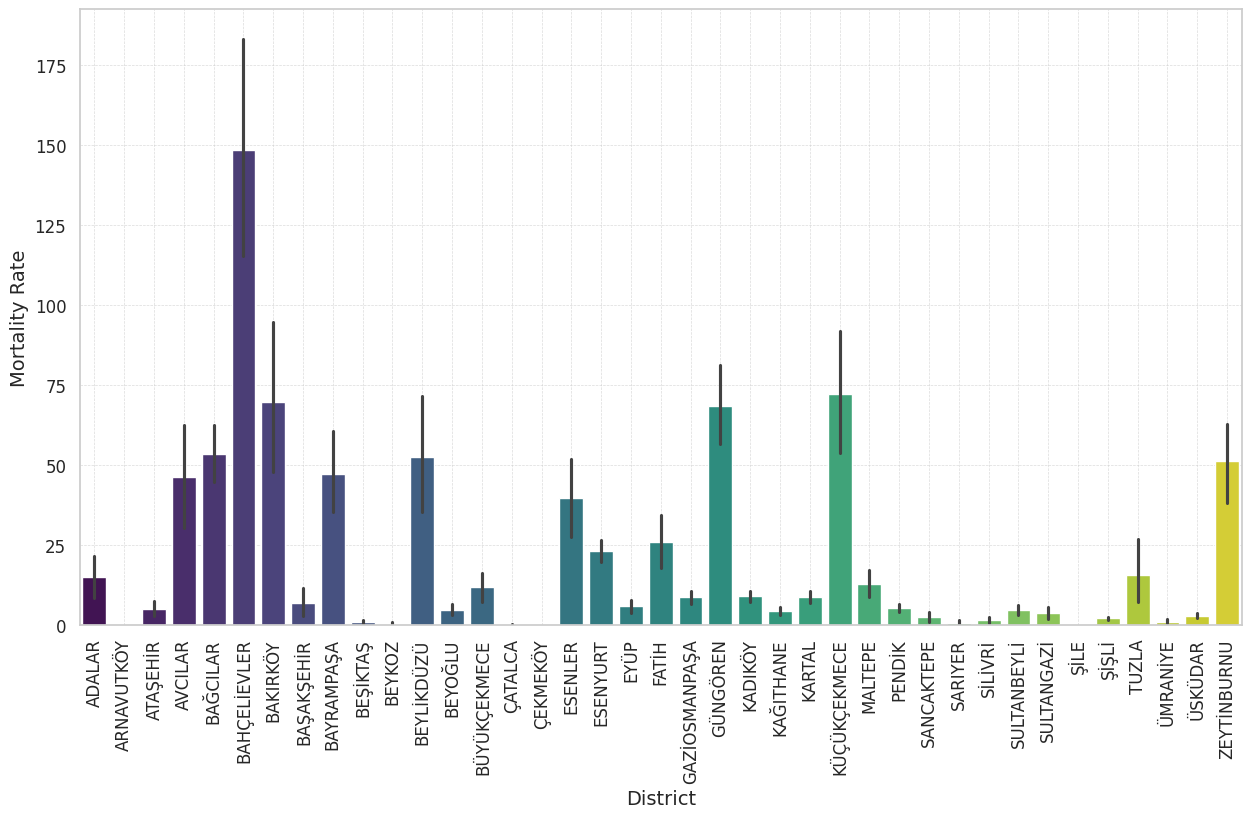

In [ ]:
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", len(df['ilce_adi'].unique()))
plt.figure(figsize=(15, 8))
sns.barplot(x="ilce_adi", y="can_kaybi_sayisi", data=df, palette=palette)
plt.xlabel("İlçeler", fontsize=14)
plt.ylabel("Ölüm Oranı", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

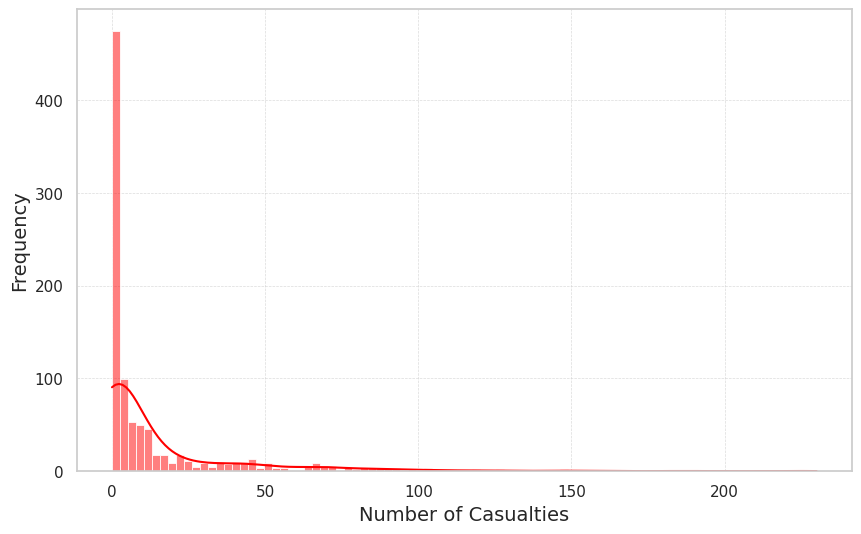

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df.can_kaybi_sayisi, kde = True, color='red')
plt.xlabel("Number of Casualties", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

In [ ]:
df["can_kaybi_sayisi"].describe()

,can_kaybi_sayisi
count,959.000000
mean,14.749739
std,28.838763
min,0.000000
25%,0.000000
50%,3.000000
75%,13.000000
max,230.000000


In [ ]:
numeric_df = df.select_dtypes(include=[float, int])

In [ ]:
corr = numeric_df.corr()

In [ ]:
print(corr)

                              mahalle_koy_uavt  cok_agir_hasarli_bina_sayisi  \
mahalle_koy_uavt                      1.000000                     -0.219561   
cok_agir_hasarli_bina_sayisi         -0.219561                      1.000000   
agir_hasarli_bina_sayisi             -0.264787                      0.912125   
orta_hasarli_bina_sayisi             -0.308731                      0.763863   
hafif_hasarli_bina_sayisi            -0.367522                      0.592846   
can_kaybi_sayisi                     -0.177390                      0.831466   
agir_yarali_sayisi                   -0.173552                      0.865972   
hastanede_tedavi_sayisi              -0.190762                      0.834955   
hafif_yarali_sayisi                  -0.203439                      0.827963   
dogalgaz_boru_hasari                 -0.219315                      0.525448   
icme_suyu_boru_hasari                -0.226392                      0.539754   
atik_su_boru_hasari                  -0.

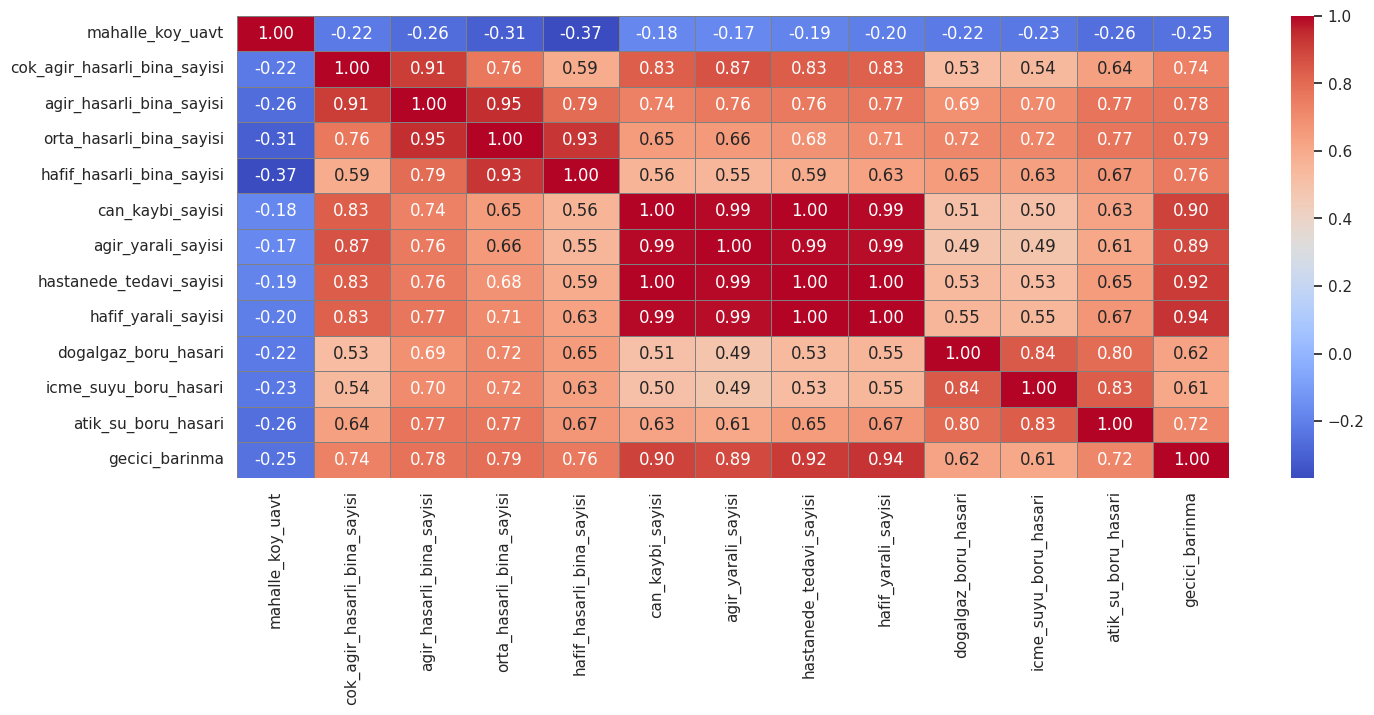

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.6, linecolor='gray')
plt.show()

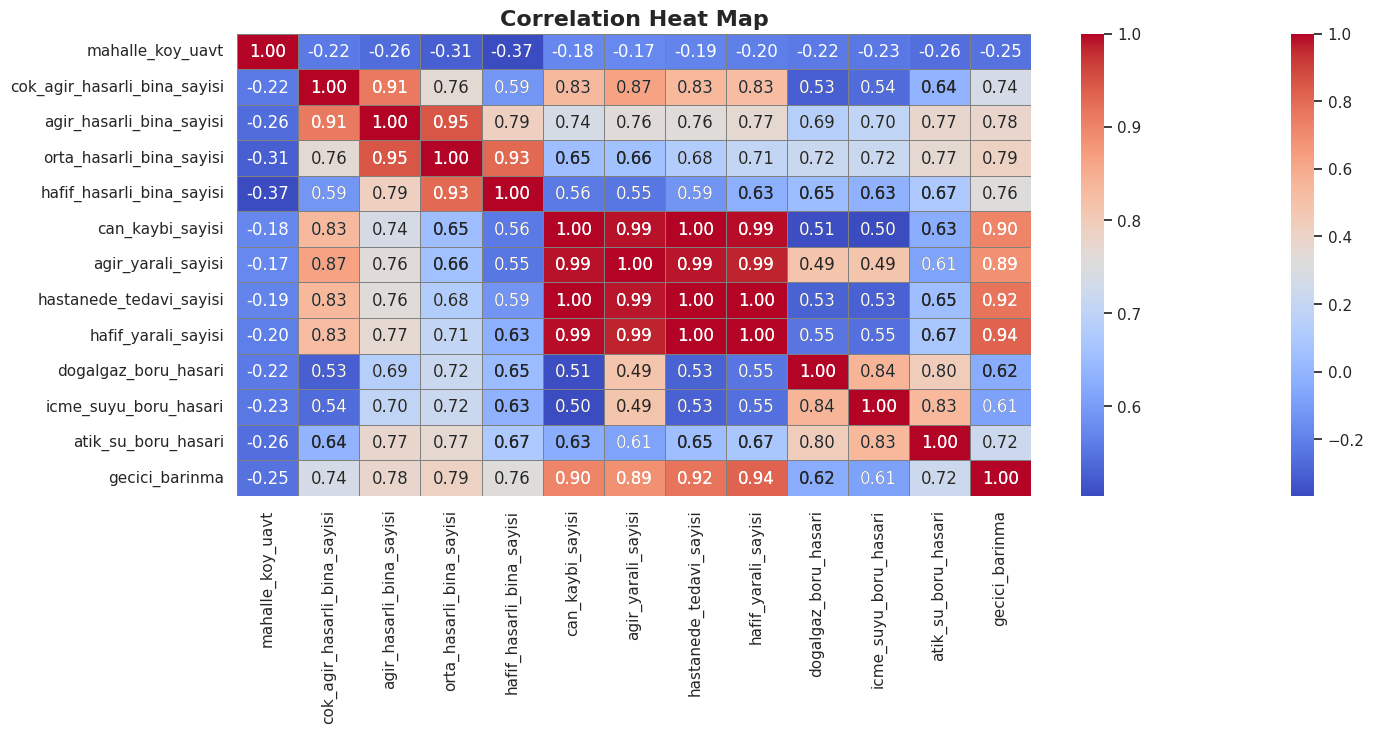

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title("Correlation Heat Map", fontsize=16, fontweight='bold')
mask = np.zeros_like(corr)
mask[np.abs(corr) < 0.5] = True
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor='gray', mask=mask)
plt.show()

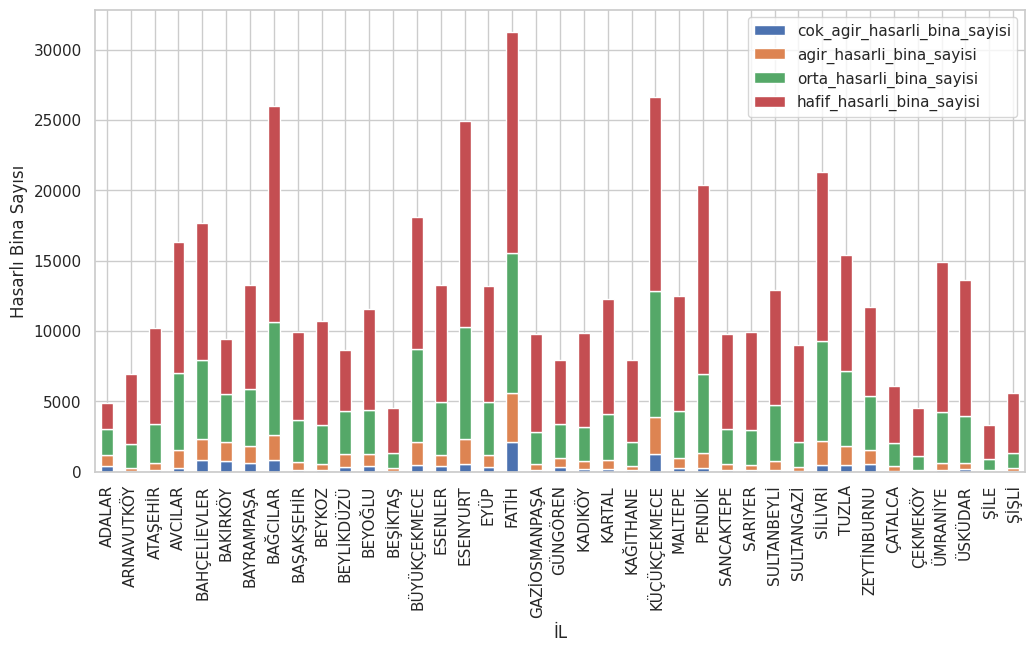

In [ ]:
df_grouped = df.groupby('ilce_adi')[['cok_agir_hasarli_bina_sayisi', 'agir_hasarli_bina_sayisi', 'orta_hasarli_bina_sayisi', 'hafif_hasarli_bina_sayisi']].sum()
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('İL')
plt.ylabel('Hasarlı Bina Sayısı')
plt.show()

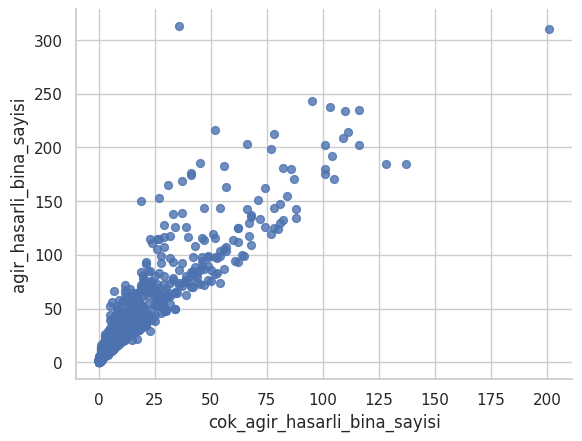

In [ ]:
df.plot(kind='scatter', x='cok_agir_hasarli_bina_sayisi', y='agir_hasarli_bina_sayisi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

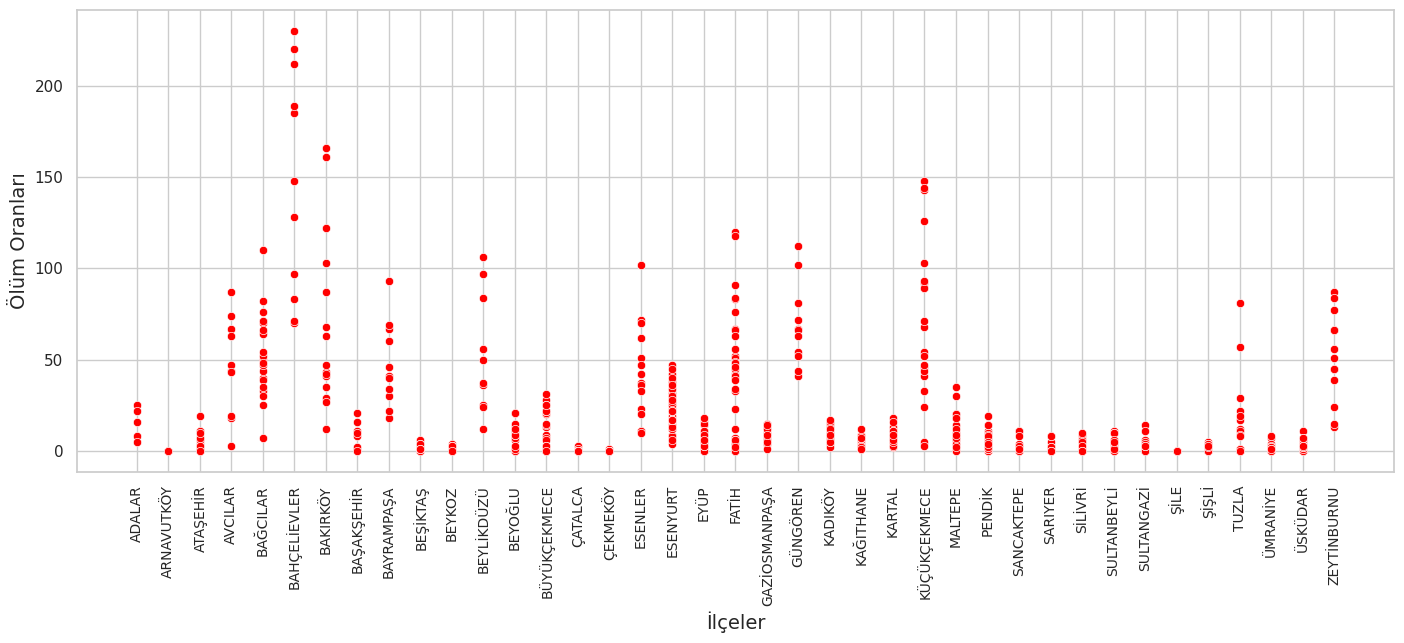

In [ ]:
plt.figure(figsize=(17, 6))
sns.scatterplot(x="ilce_adi", y="can_kaybi_sayisi", color= "red", data=df)
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("İlçeler", fontsize=14)
plt.ylabel("Ölüm Oranları", fontsize=14)
plt.show()

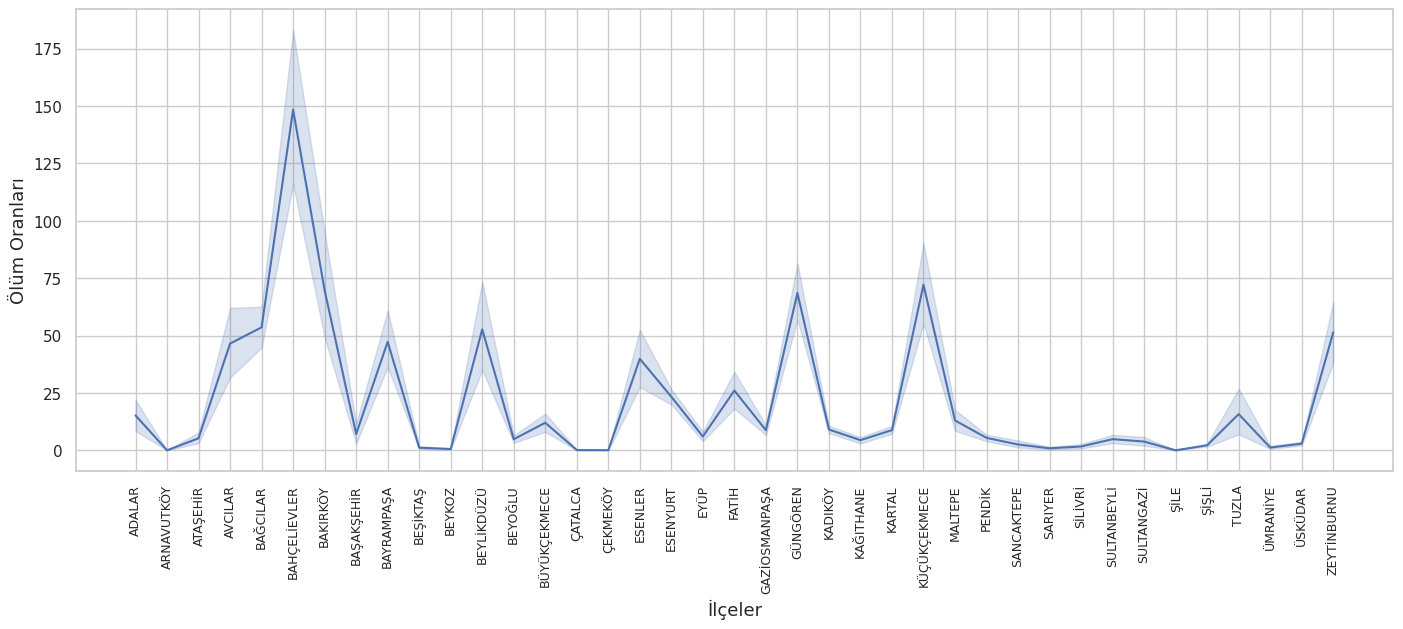

In [ ]:
plt.figure(figsize=(17,6))
sns.lineplot(x= "ilce_adi", y= "can_kaybi_sayisi", data = df);
plt.xticks(rotation = 90, fontsize=9)
plt.xlabel("İlçeler", fontsize= 13)
plt.ylabel("Ölüm Oranları", fontsize=13)
plt.show()

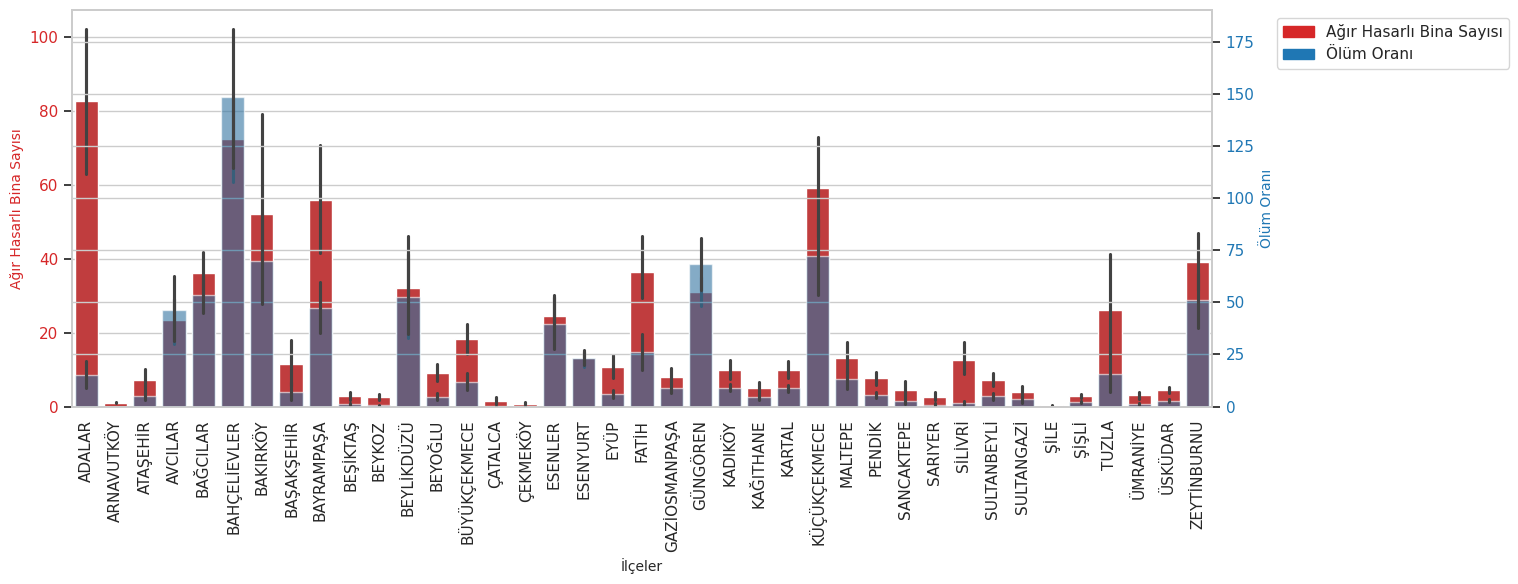

In [ ]:
fig, ax1 = plt.subplots(figsize=(13, 6))
color = 'tab:red'
ax1.set_xlabel('İlçeler', fontsize=10)
ax1.set_ylabel('Ağır Hasarlı Bina Sayısı', fontsize=10, color=color)
sns.barplot(x='ilce_adi', y='cok_agir_hasarli_bina_sayisi', data=df, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Ölüm Oranı', fontsize=10, color=color)
sns.barplot(x='ilce_adi', y='can_kaybi_sayisi', data=df, ax=ax2, alpha=0.6, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
red_patch = Patch(color='tab:red', label='Ağır Hasarlı Bina Sayısı')
blue_patch = Patch(color='tab:blue', label='Ölüm Oranı')
plt.legend(handles=[red_patch, blue_patch], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

In [5]:
y = df[["can_kaybi_sayisi"]]
x= df.drop(["can_kaybi_sayisi", "ilce_adi", "mahalle_adi"], axis=1)

In [6]:
x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=11, train_size=0.70)

In [7]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
start_train_time = time.time()
lr = LinearRegression()
model_lr = lr.fit(x_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time                   #LINEAR REGRESSION(1)

y_train_pred = lr.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = lr.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Time: {training_time} seconds")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print("-----------------------------------------------------")
print(f"Testing Time: {testing_time} seconds")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")

Training Time: 0.0647878646850586 seconds
Training MSE: 0.48854761099833577
Training MAE: 0.4730951971212816
Training R^2 Score: 0.9994249677543271
-----------------------------------------------------
Testing Time: 0.00025963783264160156 seconds
Testing MSE: 0.576072467315381
Testing MAE: 0.5046742771878443
Testing R^2 Score: 0.9992675266296105


In [ ]:
start_train_time = time.time()
rf = RandomForestRegressor(n_estimators=300, random_state=11)
model2 = rf.fit(x_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time
                                                                            #RONDOM FOREST REGRESSION(2)
y_train_pred = rf.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = rf.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Time: {training_time} seconds")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print("--------------------------------------------")
print(f"Testing Time: {testing_time} seconds")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")

Training Time: 2.610358238220215 seconds
Training MSE: 0.7991340784898158
Training MAE: 0.29001987083954295
Training R^2 Score: 0.9990594000392128
--------------------------------------------
Testing Time: 0.06031322479248047 seconds
Testing MSE: 3.7364529320987634
Testing MAE: 0.7898379629629628
Testing R^2 Score: 0.9952491180749701


                         Feature  Importance
5        hastanede_tedavi_sayisi    0.807413
6            hafif_yarali_sayisi    0.104678
4             agir_yarali_sayisi    0.081103
10                gecici_barinma    0.003573
3      hafif_hasarli_bina_sayisi    0.000883
1       agir_hasarli_bina_sayisi    0.000701
2       orta_hasarli_bina_sayisi    0.000524
0   cok_agir_hasarli_bina_sayisi    0.000447
9            atik_su_boru_hasari    0.000282
8          icme_suyu_boru_hasari    0.000229
7           dogalgaz_boru_hasari    0.000167


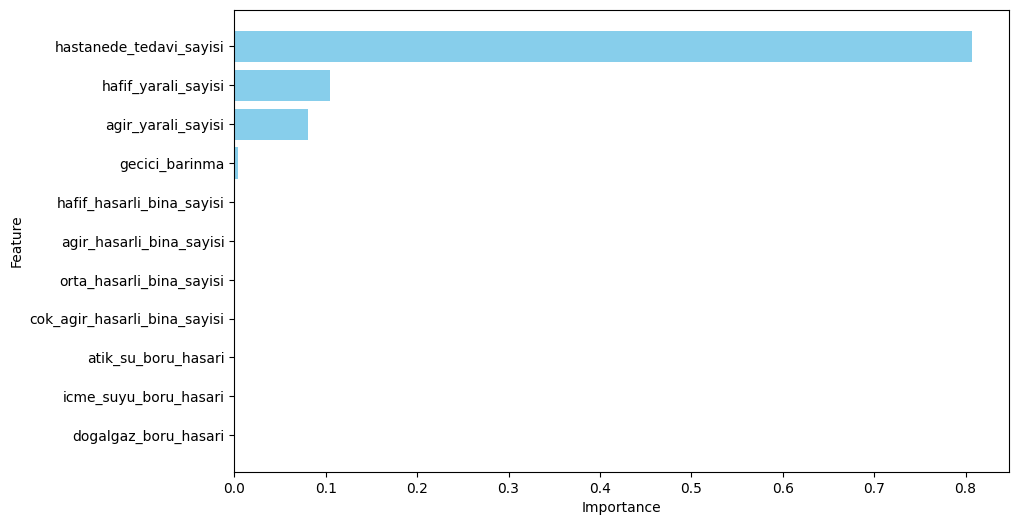

In [ ]:
feature_importances = rf.feature_importances_
features = x.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()

plt.show()

In [2]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.5 MB/s eta 0:00:00


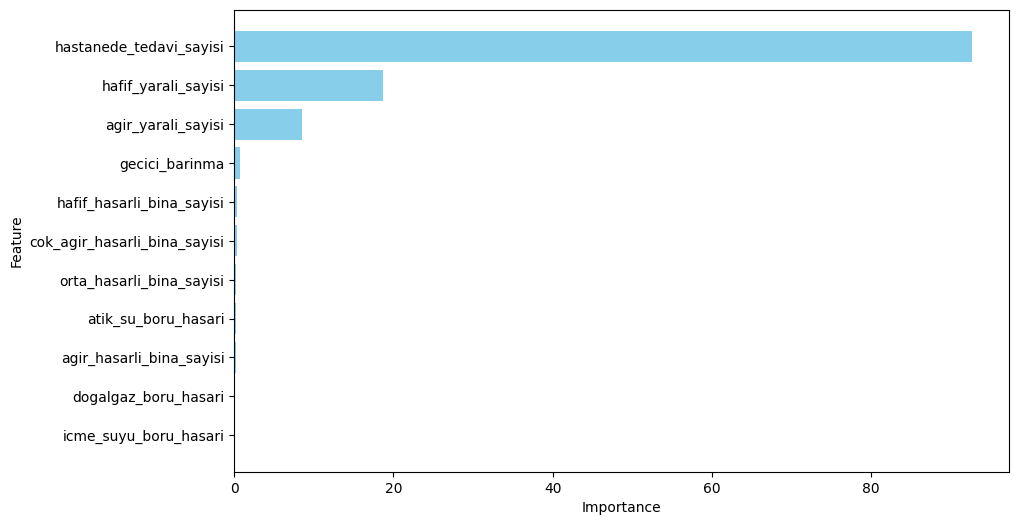

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x)

importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': np.mean(np.abs(shap_values), axis=0)
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf']  # 'poly' ve diğer kernel türlerini de deneyebilirsiniz
}

grid_search = GridSearchCV(SVR(), param_grid, cv=5)
start_train_time = time.time()
grid_search.fit(x_train_scaled, y_train)
end_train_time = time.time()                                                              #SVR(3)
training_time = end_train_time - start_train_time

best_svr = grid_search.best_estimator_

y_train_pred = best_svr.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_svr.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Time: {training_time} seconds")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print("--------------------------------------------------")
print(f"Testing Time: {testing_time} seconds")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")
print("---------------------------------------------------")
print(f"Best parameters: {grid_search.best_params_}")

Training Time: 8.270109415054321 seconds
Training MSE: 0.5562237709252597
Training MAE: 0.49764080045107223
Training R^2 Score: 0.9993453112923054
--------------------------------------------------
Testing Time: 0.0052814483642578125 seconds
Testing MSE: 0.6855993618537334
Testing MAE: 0.5324946973493615
Testing R^2 Score: 0.9991282637101992
---------------------------------------------------
Best parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}                                                                                         #XGBREGRESSOR(4)

grid_search = GridSearchCV(XGBRegressor(objective='reg:squarederror'), param_grid, cv=5)
start_train_time = time.time()
grid_search.fit(x_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

best_xgb = grid_search.best_estimator_

y_train_pred = best_xgb.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_xgb.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Time: {training_time} seconds")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print("----------------------------------------------------")
print(f"Testing Time: {testing_time} seconds")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")
print("---------------------------------------------------")
print(f"Best parameters: {grid_search.best_params_}")

Training Time: 225.4562327861786 seconds
Training MSE: 0.003515704380349642
Training MAE: 0.03840484112667505
Training R^2 Score: 0.9999958619316942
----------------------------------------------------
Testing Time: 0.002904176712036133 seconds
Testing MSE: 3.001641808833884
Testing MAE: 0.7899890006642636
Testing R^2 Score: 0.9961834268826202
---------------------------------------------------
Best parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}


Top Features Based on Mutual Information: ['hastanede_tedavi_sayisi', 'hafif_yarali_sayisi', 'agir_yarali_sayisi', 'gecici_barinma', 'cok_agir_hasarli_bina_sayisi']
Training Time: 0.004988670349121094 seconds
Training MSE: 0.48854761099833577
Training MAE: 0.4730951971212816
Training R^2 Score: 0.9994249677543271
------------------------------------------
Testing Time: 0.0004482269287109375 seconds
Testing MSE: 0.576072467315381
Testing MAE: 0.5046742771878443
Testing R^2 Score: 0.9992675266296105
------------------------------------------
Best parameters: {'fit_intercept': True}


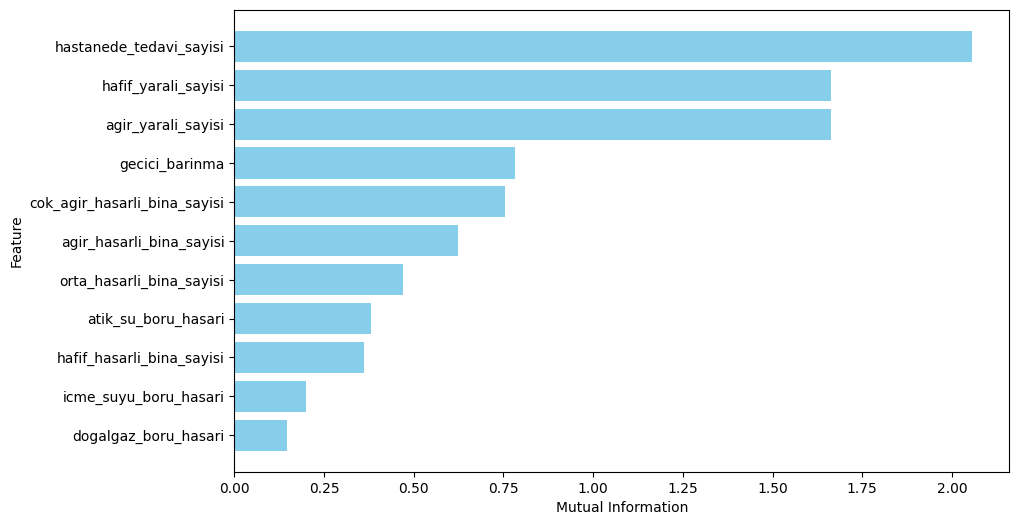

Top Features Based on Mutual Information: ['hastanede_tedavi_sayisi', 'hafif_yarali_sayisi', 'agir_yarali_sayisi', 'cok_agir_hasarli_bina_sayisi', 'gecici_barinma']
Training Time: 0.5851945877075195 seconds
Training MSE: 0.8350420268256338
Training MAE: 0.2950223546944858
Training R^2 Score: 0.9990171355235254
-----------------------------------------
Testing Time: 0.011794805526733398 seconds
Testing MSE: 3.862327777777774
Testing MAE: 0.8086805555555555
Testing R^2 Score: 0.9950890688143423
------------------------------------------
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


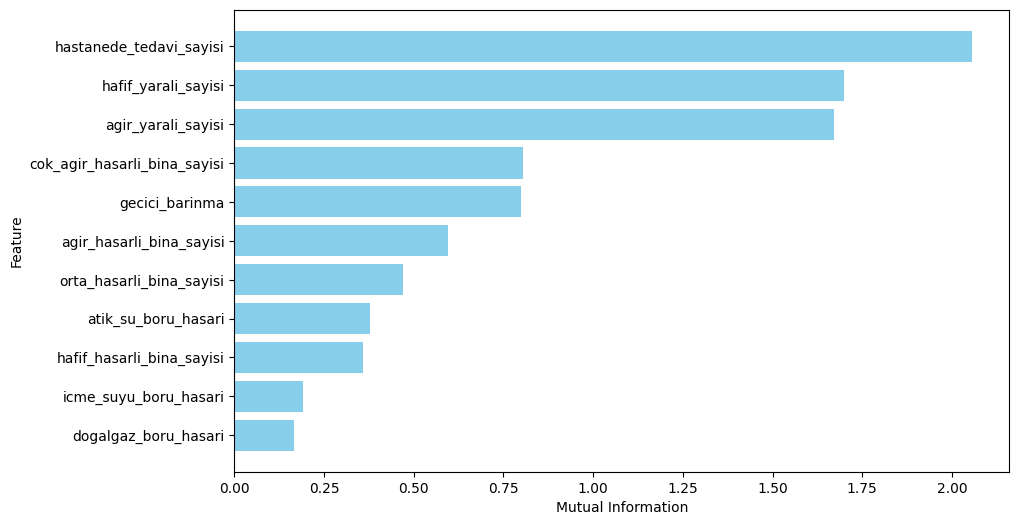

In [ ]:
mi = mutual_info_regression(x, y)
mi_df = pd.DataFrame({
    'Feature': x.columns,
    'Mutual Information': mi
}).sort_values(by='Mutual Information', ascending=False)

top_features = mi_df['Feature'].head(5)
x_selected = x[top_features]                                                          #MUTUAL INFO REGRESSOR(5)
print(f"Top Features Based on Mutual Information: {top_features.tolist()}")

start_train_time = time.time()
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

y_train_pred = lr.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = lr.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

print(f"Training Time: {training_time} seconds")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print("------------------------------------------")
print(f"Testing Time: {testing_time} seconds")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")
print("------------------------------------------")
print(f"Best parameters: {grid_search.best_params_}")

plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['Mutual Information'], color='skyblue')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()




mi = mutual_info_regression(x, y)
mi_df = pd.DataFrame({
    'Feature': x.columns,
    'Mutual Information': mi
}).sort_values(by='Mutual Information', ascending=False)

top_features = mi_df['Feature'].head(5)
x_selected = x[top_features]
print(f"Top Features Based on Mutual Information: {top_features.tolist()}")

start_train_time = time.time()
rf = RandomForestRegressor(random_state=11)
rf.fit(x_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

y_train_pred = rf.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = rf.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

print(f"Training Time: {training_time} seconds")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print("-----------------------------------------")
print(f"Testing Time: {testing_time} seconds")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")
print("------------------------------------------")
print(f"Best parameters: {grid_search.best_params_}")

plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['Mutual Information'], color='skyblue')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


In [4]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [ ]:
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5]
}

grid_search = GridSearchCV(CatBoostRegressor(silent=True), param_grid, cv=5, n_jobs=-1)
start_train_time = time.time()                                                                #CatBoostRegressor(6) (GridSearchCV)
grid_search.fit(x_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

best_catboost = grid_search.best_estimator_

y_train_pred = best_catboost.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_catboost.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Time: {training_time} seconds")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print("---------------------------------------")
print(f"Testing Time: {testing_time} seconds")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")
print("--------------------------------------------")
print(f"Best parameters: {grid_search.best_params_}")

Training Time: 184.9312765598297 seconds
Training MSE: 0.5727074505440177
Training MAE: 0.5096631828468914
Training R^2 Score: 0.9993259096063801
---------------------------------------
Testing Time: 0.001119852066040039 seconds
Testing MSE: 2.9807744446694366
Testing MAE: 0.8957112180665739
Testing R^2 Score: 0.9962099596357509
--------------------------------------------
Best parameters: {'depth': 3, 'iterations': 300, 'l2_leaf_reg': 3, 'learning_rate': 0.1}


In [11]:
param_distributions = {
    'iterations': [100, 200, 300],
    'learning_rate': uniform(0.01, 0.2),
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5]
}

random_search = RandomizedSearchCV(CatBoostRegressor(silent=True), param_distributions, n_iter=50, cv=5, n_jobs=-1, random_state=11)
start_train_time = time.time()
random_search.fit(x_train_scaled, y_train)
end_train_time = time.time()                                                                          #CatBoostRegressor(6) (RandomizedSearchCV)
training_time = end_train_time - start_train_time

best_catboost = random_search.best_estimator_

y_train_pred = best_catboost.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_catboost.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Time: {training_time} seconds")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print("--------------------------------------------")
print(f"Testing Time: {testing_time} seconds")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")
print("---------------------------------------------")
print(f"Best parameters: {random_search.best_params_}")

Training Time: 116.2156994342804 seconds
Training MSE: 0.4557974349422295
Training MAE: 0.4466422262087815
Training R^2 Score: 0.9994635154963686
--------------------------------------------
Testing Time: 0.004182338714599609 seconds
Testing MSE: 3.8441180292184307
Testing MAE: 0.9721624187264434
Testing R^2 Score: 0.9951122224220185
---------------------------------------------
Best parameters: {'depth': 3, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.15275238679161082}


In [12]:
!pip install mrmr_selection

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.9 MB/s eta 0:00:00


100%|██████████| 5/5 [00:00<00:00, 41.32it/s]


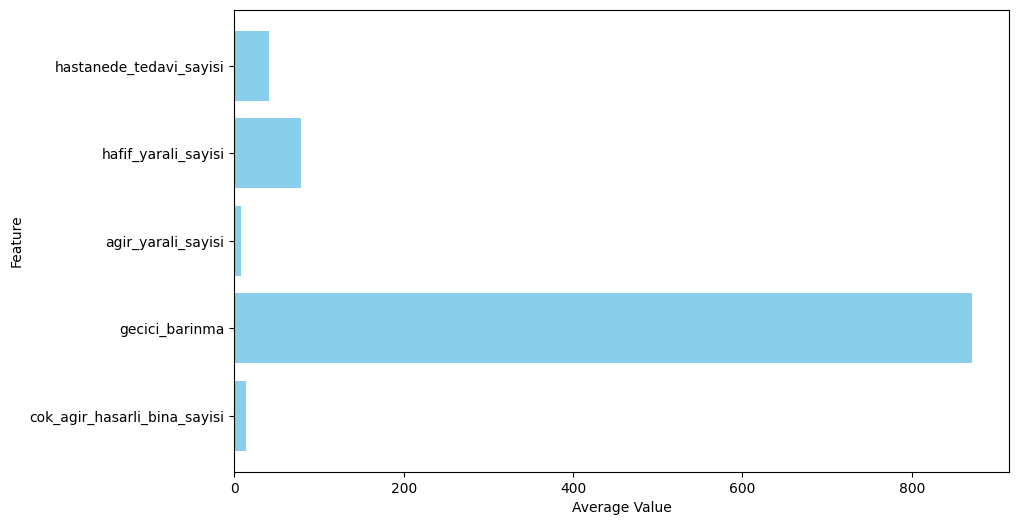

Training Time: 96.29584431648254 seconds
Training MSE: 0.4557974349422295
Training MAE: 0.4466422262087815
Training R^2 Score: 0.9994635154963686
----------------------------------------
Testing Time: 0.001844644546508789 seconds
Testing MSE: 3.8441180292184307
Testing MAE: 0.9721624187264434
Testing R^2 Score: 0.9951122224220185
-----------------------------------------
Selected Features: ['hastanede_tedavi_sayisi', 'hafif_yarali_sayisi', 'agir_yarali_sayisi', 'gecici_barinma', 'cok_agir_hasarli_bina_sayisi']
Best parameters: {'depth': 3, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.15275238679161082}


In [14]:
selected_features = mrmr_regression(X=x, y=y, K=5)
x_selected = x[selected_features]

plt.figure(figsize=(10, 6))
plt.barh(selected_features, x[selected_features].mean(), color='skyblue')
plt.xlabel('Average Value')
plt.ylabel('Feature')                                                                       #MRMR(CATBOOSTREGRESSOR)(7)
plt.gca().invert_yaxis()
plt.show()

param_distributions = {
    'iterations': [100, 200, 300],
    'learning_rate': uniform(0.01, 0.2),
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5]
}

random_search = RandomizedSearchCV(CatBoostRegressor(silent=True), param_distributions, n_iter=50, cv=5, n_jobs=-1, random_state=11)
start_train_time = time.time()
random_search.fit(x_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

best_catboost = random_search.best_estimator_

y_train_pred = best_catboost.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_catboost.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Time: {training_time} seconds")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print("----------------------------------------")
print(f"Testing Time: {testing_time} seconds")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")
print("-----------------------------------------")
print(f"Selected Features: {selected_features}")
print(f"Best parameters: {random_search.best_params_}")

100%|██████████| 5/5 [00:00<00:00, 33.69it/s]


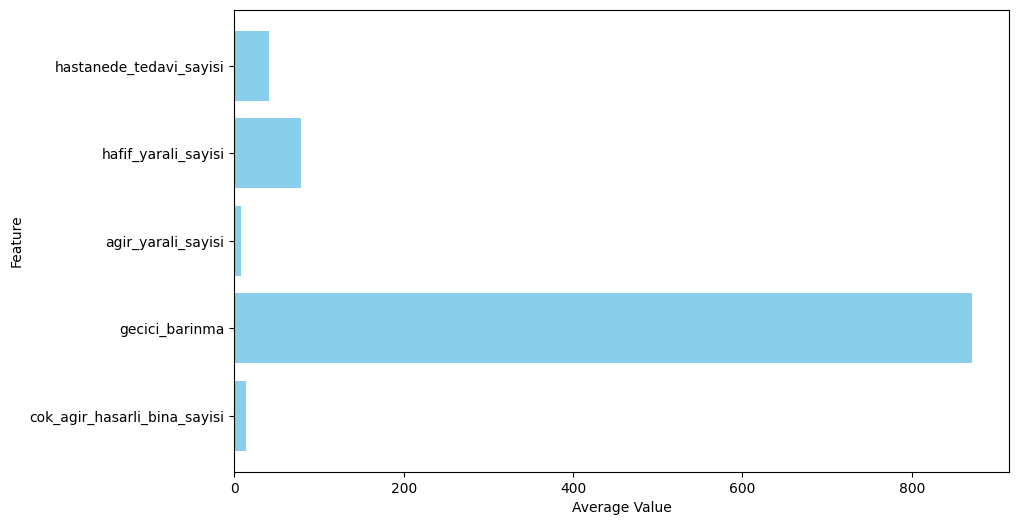

Training Time: 2.147461414337158 seconds
Training MSE: 2.2307540488986093
Training MAE: 0.4715464201306229
Training R^2 Score: 0.9973743490267801
----------------------------------------
Testing Time: 0.0005385875701904297 seconds
Testing MSE: 6.583727789272468
Testing MAE: 1.074339375901876
Testing R^2 Score: 0.9916288217938817
---------------------------------------
Selected Features: ['hastanede_tedavi_sayisi', 'hafif_yarali_sayisi', 'agir_yarali_sayisi', 'gecici_barinma', 'cok_agir_hasarli_bina_sayisi']
Best parameters: {'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 6}


In [17]:
selected_features = mrmr_regression(X=x, y=y, K=5)
x_selected = x[selected_features]

plt.figure(figsize=(10, 6))
plt.barh(selected_features, x[selected_features].mean(), color='skyblue')
plt.xlabel('Average Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()                                                                #MRMR(DECISIONTREEREGRESSOR)(7)

param_distributions = {
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10)
}

random_search = RandomizedSearchCV(DecisionTreeRegressor(random_state=11), param_distributions, n_iter=50, cv=5, n_jobs=-1, random_state=11)
start_train_time = time.time()
random_search.fit(x_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

best_tree = random_search.best_estimator_

y_train_pred = best_tree.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_tree.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Time: {training_time} seconds")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print("----------------------------------------")
print(f"Testing Time: {testing_time} seconds")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")
print("---------------------------------------")
print(f"Selected Features: {selected_features}")
print(f"Best parameters: {random_search.best_params_}")

100%|██████████| 5/5 [00:00<00:00, 33.93it/s]


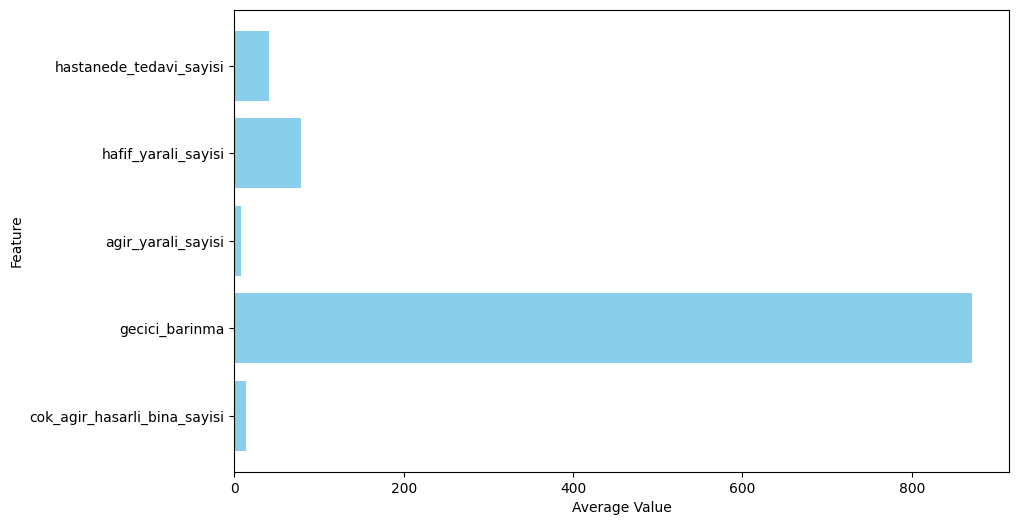

Training Time: 73.24882817268372 seconds
Training MSE: 0.7825719179918453
Training MAE: 0.2875075597279962
Training R^2 Score: 0.9990788940990136
--------------------------------------
Testing Time: 0.024773359298706055 seconds
Testing MSE: 1.8126519511944754
Testing MAE: 0.6982590893944453
Testing R^2 Score: 0.9976952217657235
----------------------------------------
Selected Features: ['hastanede_tedavi_sayisi', 'hafif_yarali_sayisi', 'agir_yarali_sayisi', 'gecici_barinma', 'cok_agir_hasarli_bina_sayisi']
Best parameters: {'max_depth': 18, 'max_features': 0.8833092099413072, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 348}


In [19]:
selected_features = mrmr_regression(X=x, y=y, K=5)
x_selected = x[selected_features]

plt.figure(figsize=(10, 6))
plt.barh(selected_features, x[selected_features].mean(), color='skyblue')             #MRMR(ExtraTreesRegressor)(7)
plt.xlabel('Average Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x_selected, y, random_state=11, train_size=0.70)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

param_distributions = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': uniform(0.1, 1.0)
}

random_search = RandomizedSearchCV(ExtraTreesRegressor(random_state=11), param_distributions, n_iter=50, cv=5, n_jobs=-1, random_state=11)
start_train_time = time.time()
random_search.fit(x_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

best_extra_trees = random_search.best_estimator_

y_train_pred = best_extra_trees.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_extra_trees.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Time: {training_time} seconds")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print("--------------------------------------")
print(f"Testing Time: {testing_time} seconds")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")
print("----------------------------------------")
print(f"Selected Features: {selected_features}")
print(f"Best parameters: {random_search.best_params_}")

100%|██████████| 5/5 [00:00<00:00, 34.06it/s]


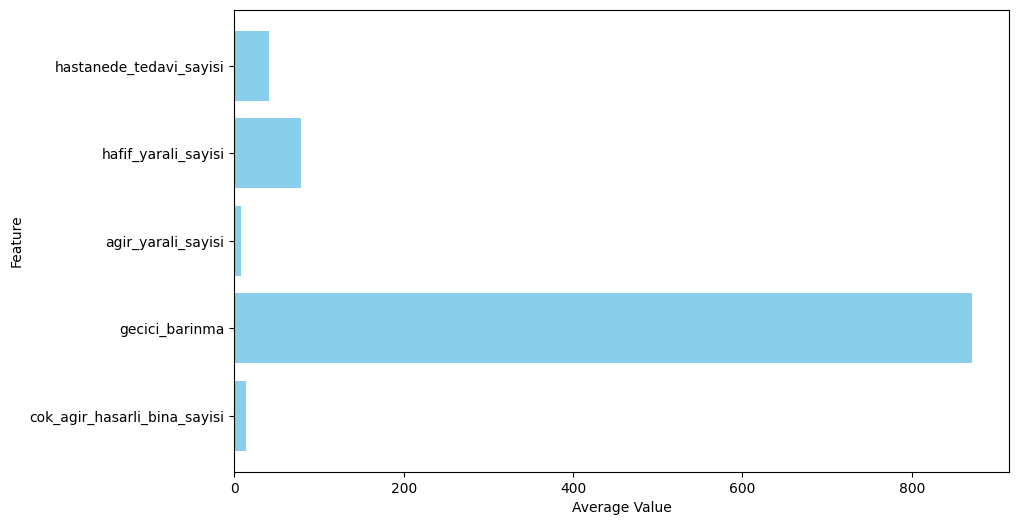

Training Time: 1.8830811977386475 seconds
Training MSE: 0.0
Training MAE: 0.0
Training R^2 Score: 1.0
--------------------------------------------
Testing Time: 0.0028009414672851562 seconds
Testing MSE: 4.973740457261262
Testing MAE: 1.1074921223586311
Testing R^2 Score: 0.9936759129399979
--------------------------------------------
Selected Features: ['hastanede_tedavi_sayisi', 'hafif_yarali_sayisi', 'agir_yarali_sayisi', 'gecici_barinma', 'cok_agir_hasarli_bina_sayisi']
Best parameters: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}


In [21]:
selected_features = mrmr_regression(X=x, y=y, K=5)
x_selected = x[selected_features]
                                                                                               #MRMR(KNeighborsRegressor)(7)
plt.figure(figsize=(10, 6))
plt.barh(selected_features, x[selected_features].mean(), color='skyblue')
plt.xlabel('Average Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

param_distributions = {
    'n_neighbors': randint(1, 50),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

random_search = RandomizedSearchCV(KNeighborsRegressor(), param_distributions, n_iter=50, cv=5, n_jobs=-1, random_state=11)
start_train_time = time.time()
random_search.fit(x_train_scaled, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

best_knn = random_search.best_estimator_

y_train_pred = best_knn.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

start_test_time = time.time()
y_test_pred = best_knn.predict(x_test_scaled)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Time: {training_time} seconds")
print(f"Training MSE: {train_mse}")
print(f"Training MAE: {train_mae}")
print(f"Training R^2 Score: {train_r2}")
print("--------------------------------------------")
print(f"Testing Time: {testing_time} seconds")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing R^2 Score: {test_r2}")
print("--------------------------------------------")
print(f"Selected Features: {selected_features}")
print(f"Best parameters: {random_search.best_params_}")

In [22]:
!pip install boruta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.0 MB/s eta 0:00:00


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	6
Iteration:

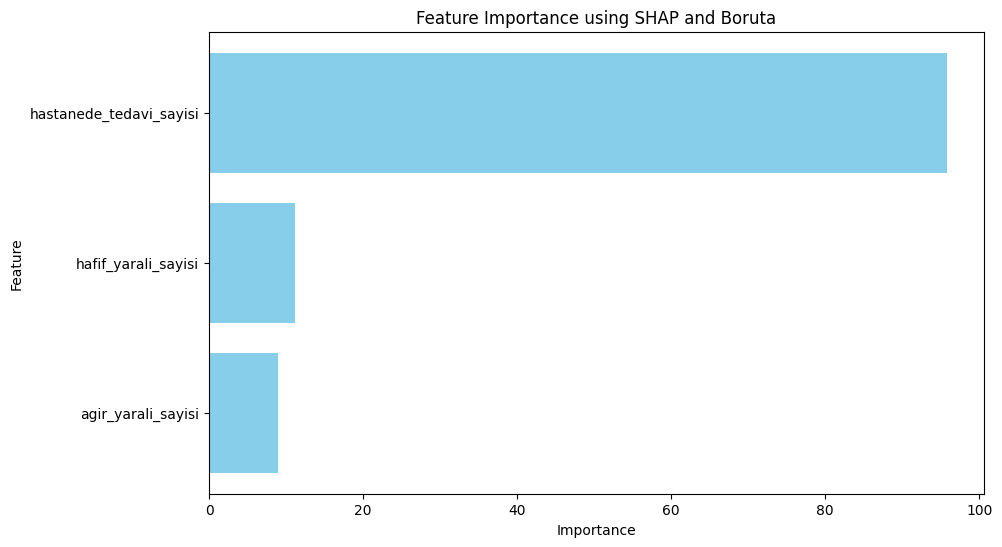

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=11, train_size=0.70)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

rf = RandomForestRegressor(n_estimators=100, random_state=11)
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=11, verbose=2)
boruta_selector.fit(x_train_scaled, y_train.values.ravel())

selected_features = x.columns[boruta_selector.support_]
x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]

explainer = shap.TreeExplainer(rf, feature_perturbation='interventional')
shap_values = explainer.shap_values(x_train_selected, check_additivity=False)

importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': np.mean(np.abs(shap_values), axis=0)
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using SHAP and Boruta')
plt.gca().invert_yaxis()
plt.show()

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	6
Iteration:

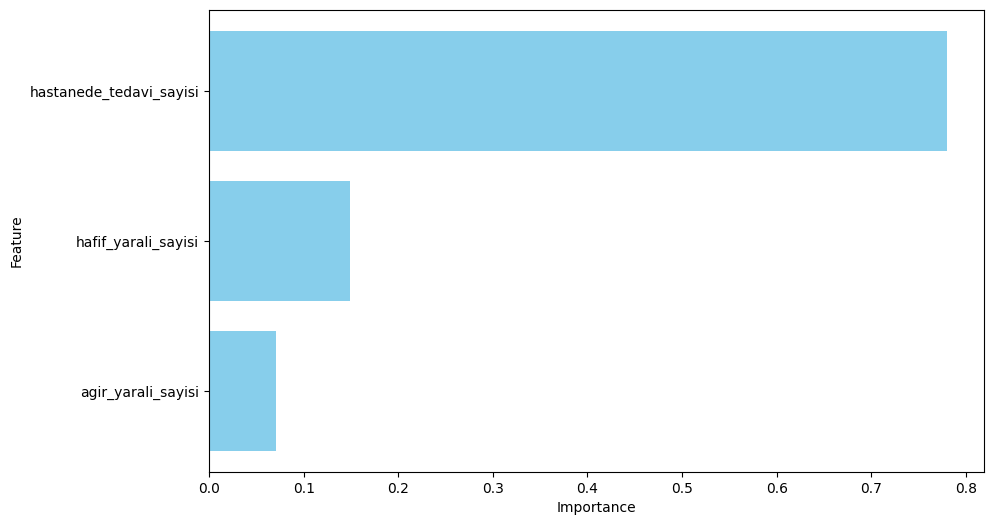

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=11, train_size=0.70)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

rf = RandomForestRegressor(n_estimators=100, random_state=11)
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=11, verbose=2)
boruta_selector.fit(x_train_scaled, y_train.values.ravel())

selected_features = x.columns[boruta_selector.support_]
x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]

rf_selected = RandomForestRegressor(n_estimators=100, random_state=11)
rf_selected.fit(x_train_selected, y_train)

importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': rf_selected.feature_importances_
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	6
Iteration:

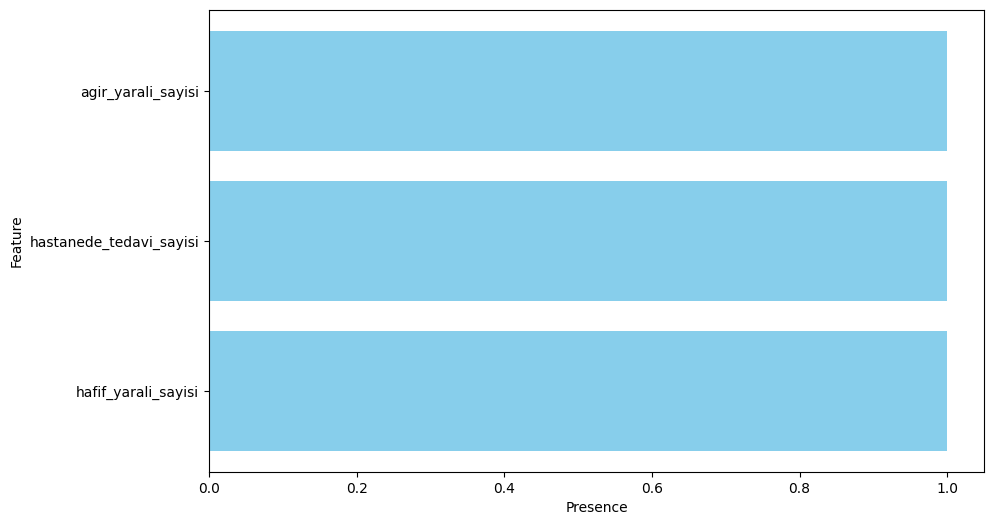

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=11, train_size=0.70)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

rf = RandomForestRegressor(n_estimators=100, random_state=11)
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=11, verbose=2)
boruta_selector.fit(x_train_scaled, y_train.values.ravel())

selected_features = x.columns[boruta_selector.support_]

plt.figure(figsize=(10, 6))
plt.barh(selected_features, np.ones_like(selected_features), color='skyblue')
plt.xlabel('Presence')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

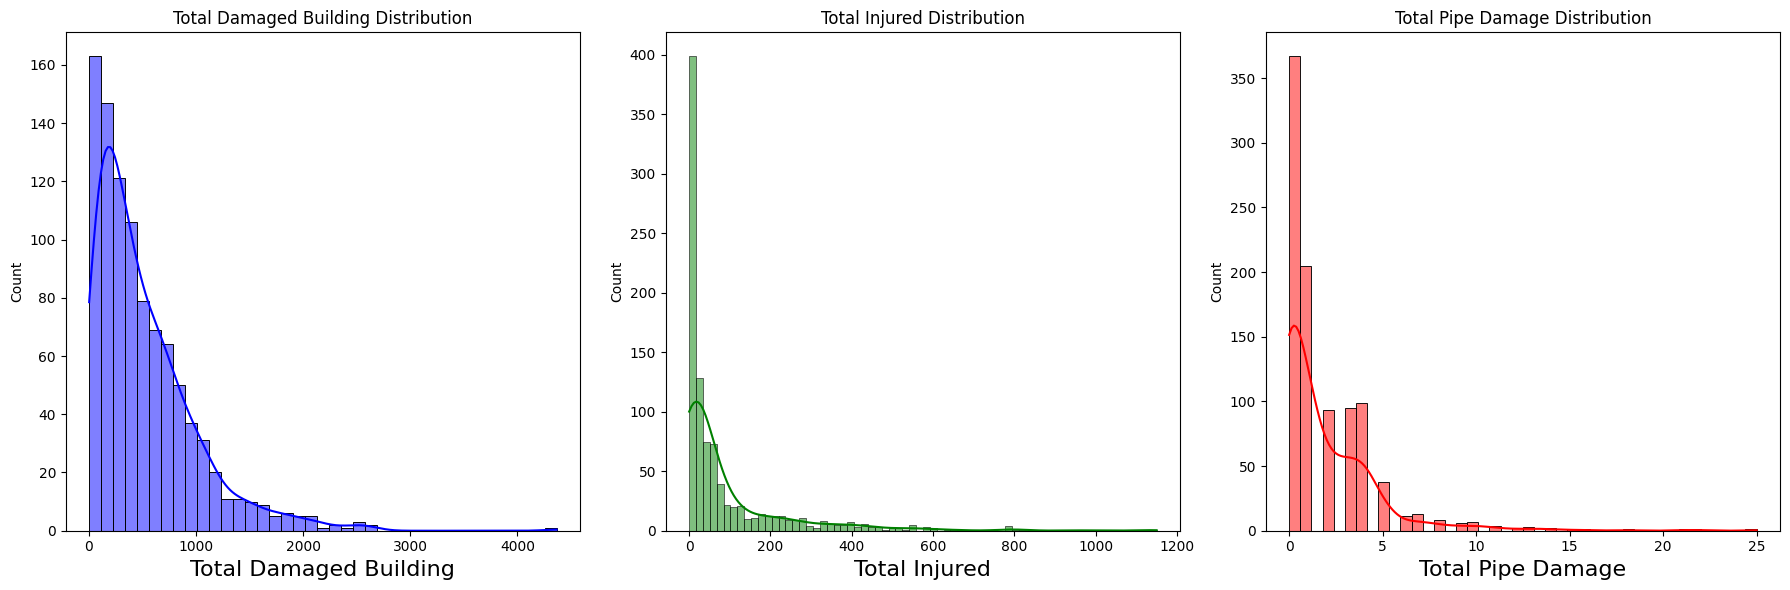

In [29]:
df['toplam_hasarli_bina'] = df['cok_agir_hasarli_bina_sayisi'] + df['agir_hasarli_bina_sayisi'] + df['orta_hasarli_bina_sayisi'] + df['hafif_hasarli_bina_sayisi']
df['toplam_yarali'] = df['agir_yarali_sayisi'] + df['hafif_yarali_sayisi']
df['toplam_boru_hasari'] = df['dogalgaz_boru_hasari'] + df['icme_suyu_boru_hasari'] + df['atik_su_boru_hasari']

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['toplam_hasarli_bina'], kde=True, color='blue')
plt.xlabel("Total Damaged Building", fontsize= 16)
plt.title('Total Damaged Building Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['toplam_yarali'], kde=True, color='green')
plt.xlabel("Total Injured", fontsize= 16)
plt.title('Total Injured Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['toplam_boru_hasari'], kde=True, color='red')
plt.xlabel("Total Pipe Damage", fontsize= 16)
plt.title('Total Pipe Damage Distribution')

plt.tight_layout()
plt.show()

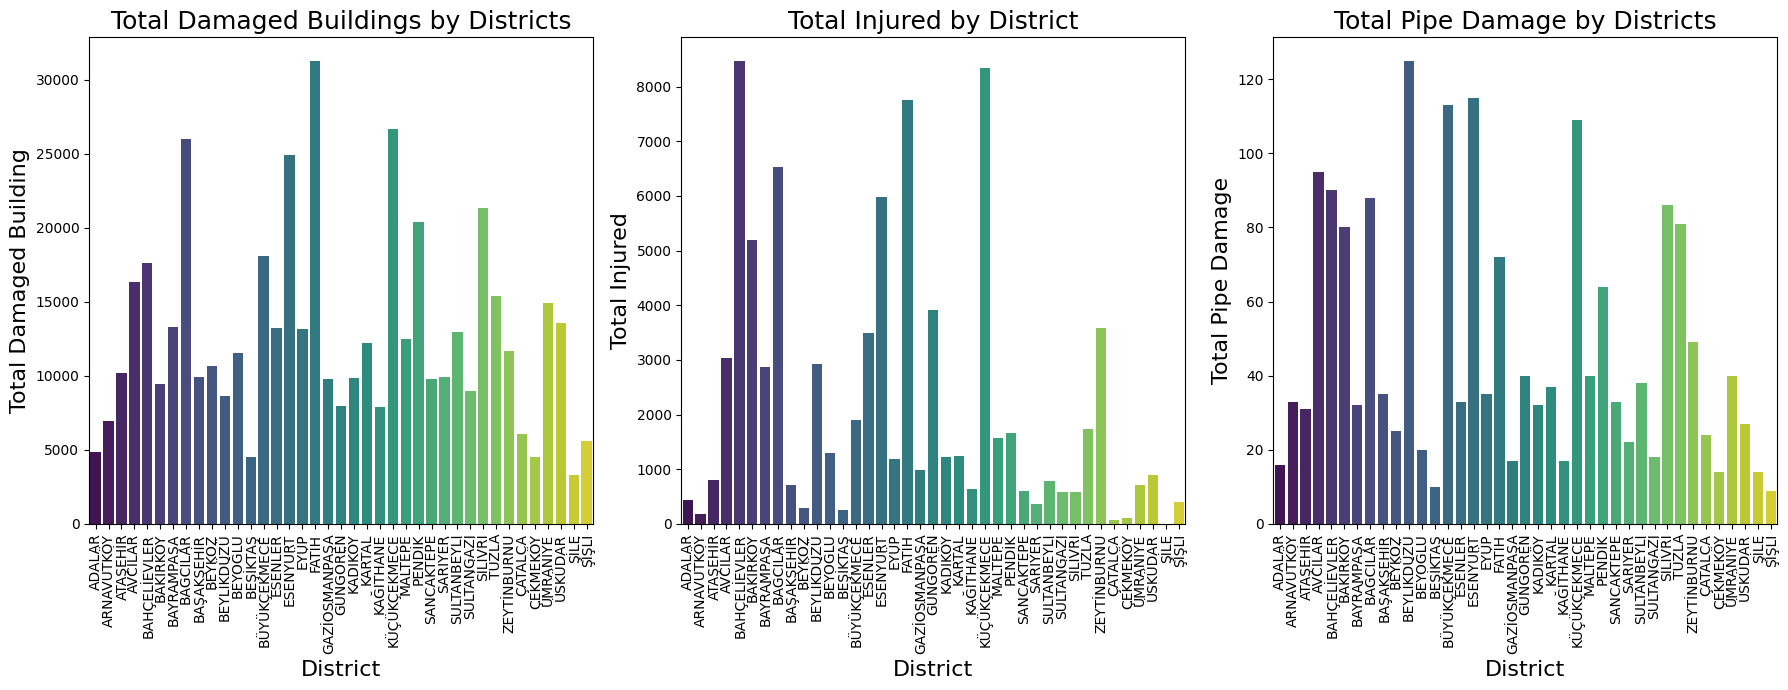

In [30]:
df_grouped = df.groupby('ilce_adi').agg({
    'toplam_hasarli_bina': 'sum',
    'toplam_yarali': 'sum',
    'toplam_boru_hasari': 'sum'
}).reset_index()

plt.figure(figsize=(18, 7))

plt.subplot(1, 3, 1)
sns.barplot(x='ilce_adi', y='toplam_hasarli_bina', data=df_grouped, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("District", fontsize=16)
plt.ylabel("Total Damaged Building", fontsize=16)
plt.title('Total Damaged Buildings by Districts', fontsize=18)

plt.subplot(1, 3, 2)
sns.barplot(x='ilce_adi', y='toplam_yarali', data=df_grouped, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("District", fontsize=16)
plt.ylabel("Total Injured", fontsize=16)
plt.title('Total Injured by District', fontsize=18)

plt.subplot(1, 3, 3)
sns.barplot(x='ilce_adi', y='toplam_boru_hasari', data=df_grouped, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("District", fontsize=16)
plt.ylabel("Total Pipe Damage", fontsize=16)
plt.title('Total Pipe Damage by Districts', fontsize=18)

plt.tight_layout()
plt.show()

#Creates and displays three bar charts showing total damaged buildings, total injured and total pipe damage by district

In [37]:
json_url = 'https://raw.githubusercontent.com/alicangnll/ibb-istanbul-depremi-tahmini-2021/main/ilce.json'
json_data = pd.read_json(json_url)

print(json_data.head())

gdf = gpd.GeoDataFrame(
    json_data,
    geometry=json_data.apply(lambda row: Point(row['lon'], row['lat']), axis=1),
    crs="EPSG:4326"
)

print(gdf.head())

ib_data = pd.read_csv("deprem_senaryosu.csv", encoding="ISO-8859-9", delimiter=";")
ib_data['risk_level'] = ib_data['can_kaybi_sayisi']

gdf = gdf.merge(ib_data[['ilce_adi', 'risk_level']], left_on='ilce_adi', right_on='ilce_adi', how='left')

m = folium.Map(location=[41.0082, 28.9784], zoom_start=11)

Choropleth(
    geo_data=gdf,
    data=gdf,
    columns=['ilce_adi', 'risk_level'],
    key_on='feature.properties.ilce_adi',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Risk Seviyesi'
).add_to(m)

m.save('/content/istanbul_risk_haritasi2.html')

html = Html("""<iframe src="/content/istanbul_risk_haritasi2.html" width="800" height="600"></iframe>""", script=True)

m.add_child(html)

m

                    ilce_adi       lat       lon
0           ADALAR,BURGAZADA  40.88113  29.07024
1          ADALAR,HEYBELIADA  40.87682  29.10167
2           ADALAR,KINALIADA  40.90941  29.05241
3               ADALAR,NIZAM  40.87501  29.12913
4  ARNAVUTKÖY,ADNAN MENDERES  41.21245  28.70452
                    ilce_adi       lat       lon                   geometry
0           ADALAR,BURGAZADA  40.88113  29.07024  POINT (29.07024 40.88113)
1          ADALAR,HEYBELIADA  40.87682  29.10167  POINT (29.10167 40.87682)
2           ADALAR,KINALIADA  40.90941  29.05241  POINT (29.05241 40.90941)
3               ADALAR,NIZAM  40.87501  29.12913  POINT (29.12913 40.87501)
4  ARNAVUTKÖY,ADNAN MENDERES  41.21245  28.70452  POINT (28.70452 41.21245)


In [39]:
def hardlim(x):
    return np.where(x >= 0, 1, 0)

def tribas(x):
    return np.maximum(1 - np.abs(x), 0)

def radbas(x):
    return np.exp(-np.power(x, 2))

def CELM(TrainingData_File, TestingData_File, NumberofHiddenNeurons, ActivationFunction, C):
    train_data = np.loadtxt(TrainingData_File)
    T = train_data[:, 0].T
    P = train_data[:, 1:].T
    test_data = np.loadtxt(TestingData_File)
    TV_T = test_data[:, 0].T
    TV_P = test_data[:, 1:].T
    NumberofTrainingData = P.shape[1]
    NumberofTestingData = TV_P.shape[1]
    NumberofInputNeurons = P.shape[0]

    start_time_train = time.time()

    InputWeight = np.random.rand(NumberofHiddenNeurons, NumberofInputNeurons) * 2 - 1
    BiasofHiddenNeurons = np.random.rand(NumberofHiddenNeurons, 1)

    tempH = np.dot(InputWeight, P) + BiasofHiddenNeurons

    if ActivationFunction in ['sig', 'sigmoid']:
        H = 1 / (1 + np.exp(-tempH))
    elif ActivationFunction == 'sin':
        H = np.sin(tempH)
    elif ActivationFunction == 'hardlim':
        H = hardlim(tempH)
    elif ActivationFunction == 'tribas':
        H = tribas(tempH)
    elif ActivationFunction == 'radbas':
        H = radbas(tempH)

    if C == 10 ** 100:
        OutputWeight = np.dot(pinv(H.T), T.T)
    else:
        OutputWeight = np.linalg.solve(np.eye(H.shape[0]) / C + np.dot(H, H.T), np.dot(H, T.T))

    end_time_train = time.time()
    TrainingTime = end_time_train - start_time_train

    Y = np.dot(H.T, OutputWeight).T
    TrainingRMSE = np.sqrt(np.mean(np.square(T - Y)))
    TrainingMAE = np.mean(np.abs(T - Y))
    TrainingMSE = mean_squared_error(T, Y)
    TrainingR2 = r2_score(T, Y)

    start_time_test = time.time()
    tempH_test = np.dot(InputWeight, TV_P) + BiasofHiddenNeurons
    if ActivationFunction in ['sig', 'sigmoid']:
        H_test = 1 / (1 + np.exp(-tempH_test))
    elif ActivationFunction == 'sin':
        H_test = np.sin(tempH_test)
    elif ActivationFunction == 'hardlim':
        H_test = hardlim(tempH_test)
    elif ActivationFunction == 'tribas':
        H_test = tribas(tempH_test)
    elif ActivationFunction == 'radbas':
        H_test = radbas(tempH_test)
    TY = np.dot(H_test.T, OutputWeight).T
    end_time_test = time.time()
    TestingTime = end_time_test - start_time_test
    TestingRMSE = np.sqrt(np.mean(np.square(TV_T - TY)))
    TestingMAE = np.mean(np.abs(TV_T - TY))
    TestingMSE = mean_squared_error(TV_T, TY)
    TestingR2 = r2_score(TV_T, TY)

    return TrainingTime, TestingTime, TrainingRMSE, TestingRMSE, TrainingMAE, TestingMAE, TrainingMSE, TestingMSE, TrainingR2, TestingR2

activation_functions = ['sig', 'sin', 'hardlim', 'tribas', 'radbas']
neurons_list = [100, 200, 500, 1000, 2000, 5000]
c_list = [10, 100, 1000, 10000, 100000, 10**10]

results_list = []

for act_func in activation_functions:
    for neurons in neurons_list:
        for c in c_list:
            train_data = np.column_stack((y_train, x_train))
            test_data = np.column_stack((y_test, x_test))

            np.savetxt('temp_train.txt', train_data)
            np.savetxt('temp_test.txt', test_data)

            TrainingTime, TestingTime, TrainingRMSE, TestingRMSE, TrainingMAE, TestingMAE, TrainingMSE, TestingMSE, TrainingR2, TestingR2 = CELM(
                'temp_train.txt',
                'temp_test.txt',
                NumberofHiddenNeurons=neurons,
                ActivationFunction=act_func,
                C=c
            )

            results_list.append({
                'Activation': act_func,
                'Neurons': neurons,
                'C': c,
                'Train Time (s)': TrainingTime,
                'Test Time (s)': TestingTime,
                'Train RMSE': TrainingRMSE,
                'Test RMSE': TestingRMSE,
                'Train MAE': TrainingMAE,
                'Test MAE': TestingMAE,
                'Train MSE': TrainingMSE,
                'Test MSE': TestingMSE,
                'Train R²': TrainingR2,
                'Test R²': TestingR2
            })

            os.remove('temp_train.txt')
            os.remove('temp_test.txt')

results = pd.DataFrame(results_list)

print(results.to_string(index=False))

best_rmse = results['Test RMSE'].min()
best_mae = results['Test MAE'].min()
best_mse = results['Test MSE'].min()
best_rkare = results['Test R²'].max()

print("\nEn iyi Test RMSE:")
print(results[results['Test RMSE'] == best_rmse][['Activation', 'Neurons', 'C', 'Test RMSE']].to_string(index=False))

print("\nEn iyi Test MAE:")
print(results[results['Test MAE'] == best_mae][['Activation', 'Neurons', 'C', 'Test MAE']].to_string(index=False))

print("\nEn iyi Test MSE:")
print(results[results['Test MSE'] == best_mse][['Activation', 'Neurons', 'C', 'Test MSE']].to_string(index=False))

print("\nEn iyi Test R²:")
print(results[results['Test R²'] == best_rkare][['Activation', 'Neurons', 'C', 'Test R²']].to_string(index=False))

results.to_csv('results.csv', index=False)

Activation  Neurons           C  Train Time (s)  Test Time (s)   Train RMSE     Test RMSE    Train MAE     Test MAE    Train MSE     Test MSE  Train R²       Test R²
       sig      100          10        0.030365       0.001019 2.098753e+01     19.197061 1.097588e+01    10.411538 4.404763e+02 3.685271e+02  0.481549  5.314195e-01
       sig      100         100        0.003230       0.001013 2.630674e+01     27.475654 1.583530e+01    16.622562 6.920446e+02 7.549116e+02  0.185447  4.013356e-02
       sig      100        1000        0.003122       0.000969 1.940935e+01     20.688682 9.847592e+00    10.906766 3.767229e+02 4.280215e+02  0.556588  4.557727e-01
       sig      100       10000        0.003163       0.000982 2.119026e+01     63.847120 1.084673e+01    19.432566 4.490273e+02 4.076455e+03  0.471484 -4.183193e+00
       sig      100      100000        0.003098       0.000967 2.470230e+01     93.647924 1.426615e+01    29.655054 6.102037e+02 8.769934e+03  0.281776 -1.015093e+01
    

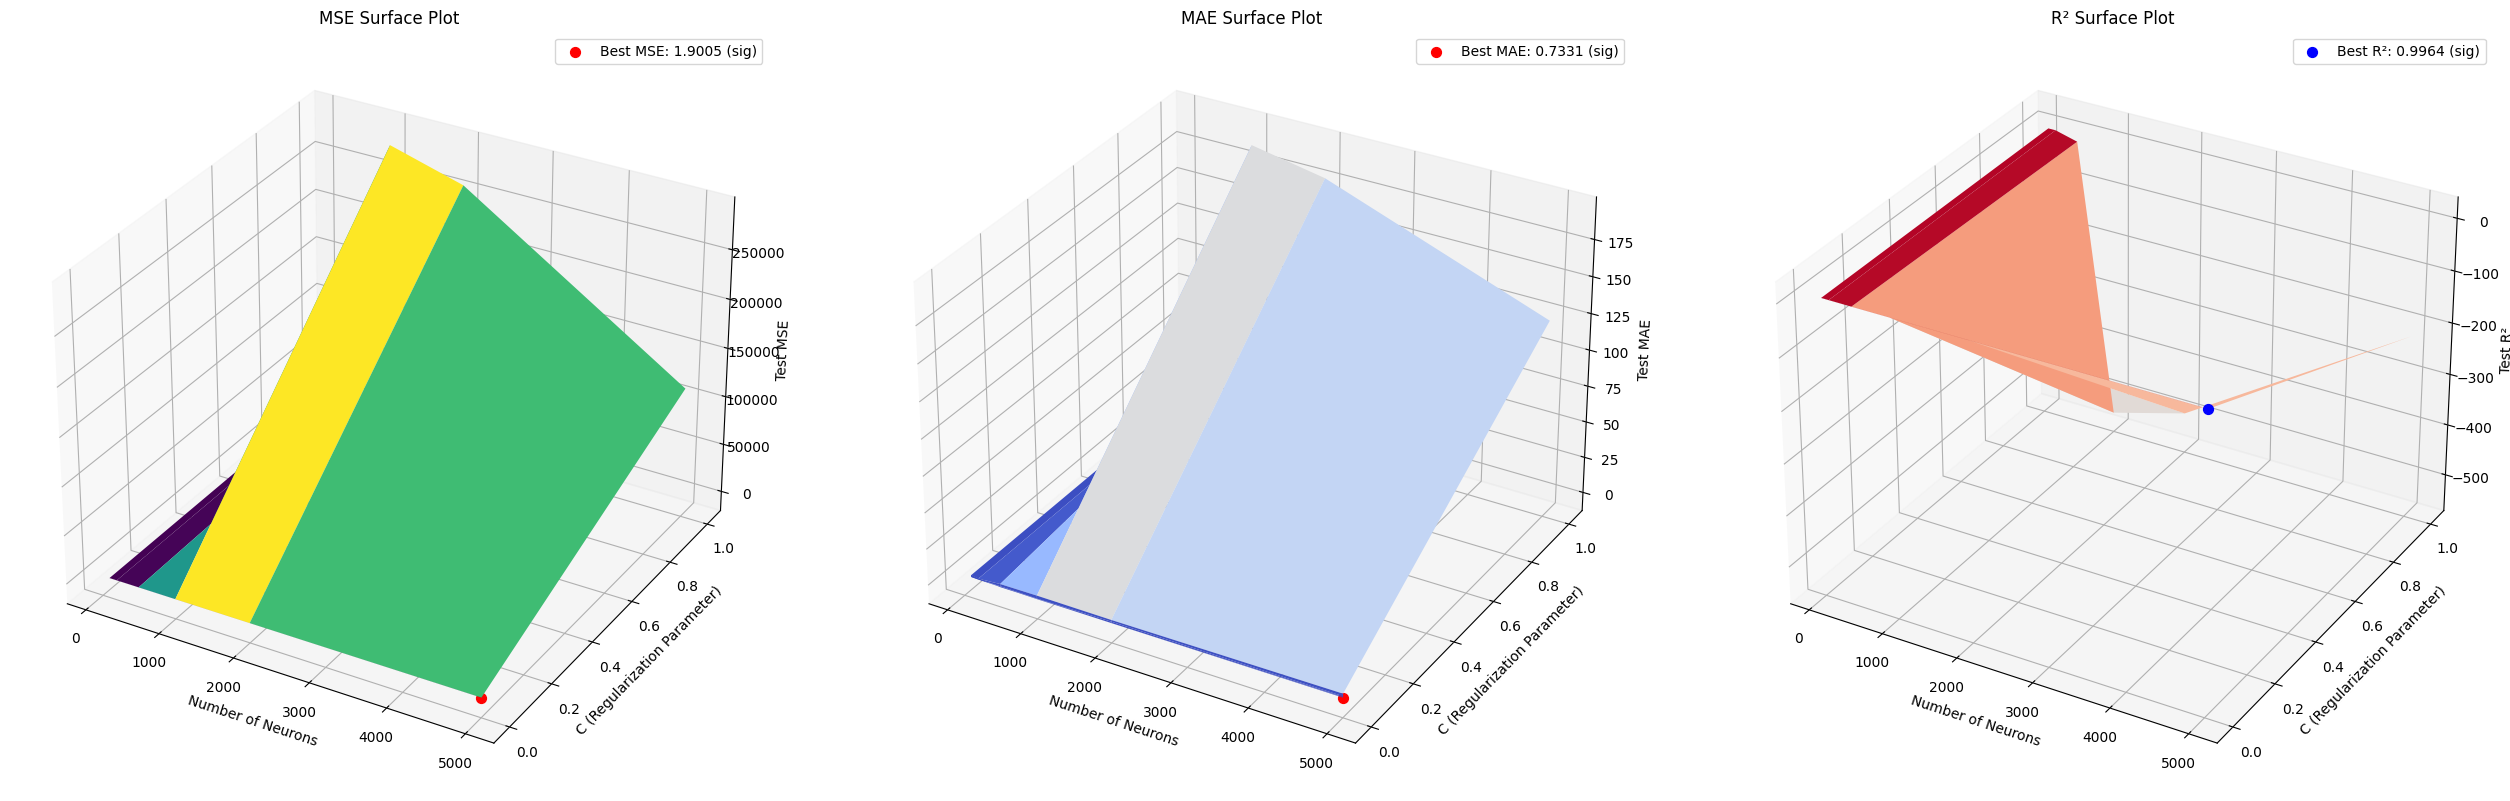

In [42]:
def hardlim(x):
    return np.where(x >= 0, 1, 0)

def tribas(x):
    return np.maximum(1 - np.abs(x), 0)

def radbas(x):
    return np.exp(-np.power(x, 2))

def CELM(TrainingData_File, TestingData_File, NumberofHiddenNeurons, ActivationFunction, C):
    train_data = np.loadtxt(TrainingData_File)
    T = train_data[:, 0].T
    P = train_data[:, 1:].T
    test_data = np.loadtxt(TestingData_File)
    TV_T = test_data[:, 0].T
    TV_P = test_data[:, 1:].T
    NumberofTrainingData = P.shape[1]
    NumberofTestingData = TV_P.shape[1]
    NumberofInputNeurons = P.shape[0]

    start_time_train = time.time()

    InputWeight = np.random.rand(NumberofHiddenNeurons, NumberofInputNeurons) * 2 - 1
    BiasofHiddenNeurons = np.random.rand(NumberofHiddenNeurons, 1)

    tempH = np.dot(InputWeight, P) + BiasofHiddenNeurons

    if ActivationFunction in ['sig', 'sigmoid']:
        H = 1 / (1 + np.exp(-tempH))
    elif ActivationFunction == 'sin':
        H = np.sin(tempH)
    elif ActivationFunction == 'hardlim':
        H = hardlim(tempH)
    elif ActivationFunction == 'tribas':
        H = tribas(tempH)
    elif ActivationFunction == 'radbas':
        H = radbas(tempH)

    if C == 10 ** 100:
        OutputWeight = np.dot(pinv(H.T), T.T)
    else:
        OutputWeight = np.linalg.solve(np.eye(H.shape[0]) / C + np.dot(H, H.T), np.dot(H, T.T))

    end_time_train = time.time()
    TrainingTime = end_time_train - start_time_train

    Y = np.dot(H.T, OutputWeight).T
    TrainingRMSE = np.sqrt(np.mean(np.square(T - Y)))
    TrainingMAE = np.mean(np.abs(T - Y))
    TrainingMSE = np.mean(np.square(T - Y))
    TrainingR2 = r2_score(T, Y)

    start_time_test = time.time()
    tempH_test = np.dot(InputWeight, TV_P) + BiasofHiddenNeurons
    if ActivationFunction in ['sig', 'sigmoid']:
        H_test = 1 / (1 + np.exp(-tempH_test))
    elif ActivationFunction == 'sin':
        H_test = np.sin(tempH_test)
    elif ActivationFunction == 'hardlim':
        H_test = hardlim(tempH_test)
    elif ActivationFunction == 'tribas':
        H_test = tribas(tempH_test)
    elif ActivationFunction == 'radbas':
        H_test = radbas(tempH_test)
    TY = np.dot(H_test.T, OutputWeight).T
    end_time_test = time.time()
    TestingTime = end_time_test - start_time_test
    TestingRMSE = np.sqrt(np.mean(np.square(TV_T - TY)))
    TestingMAE = np.mean(np.abs(TV_T - TY))
    TestingMSE = np.mean(np.square(TV_T - TY))
    TestingR2 = r2_score(TV_T, TY)

    return TrainingTime, TestingTime, TrainingRMSE, TestingRMSE, TrainingMAE, TestingMAE, TrainingMSE, TestingMSE, TrainingR2, TestingR2


X = df.drop(['ilce_adi', 'mahalle_adi', 'can_kaybi_sayisi'], axis=1)
y = df['can_kaybi_sayisi']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

activation_functions = ['sig', 'sin', 'hardlim', 'tribas', 'radbas']
neurons_list = [100, 200, 500, 1000, 2000, 5000]
c_list = [10, 100, 1000, 10000, 100000, 10**10]

results_list = []

for act_func in activation_functions:
    for neurons in neurons_list:
        for c in c_list:
            train_data = np.column_stack((y_train, X_train))
            test_data = np.column_stack((y_test, X_test))

            np.savetxt('temp_train.txt', train_data)
            np.savetxt('temp_test.txt', test_data)

            TrainingTime, TestingTime, TrainingRMSE, TestingRMSE, TrainingMAE, TestingMAE, TrainingMSE, TestingMSE, TrainingR2, TestingR2 = CELM(
                'temp_train.txt',
                'temp_test.txt',
                NumberofHiddenNeurons=neurons,
                ActivationFunction=act_func,
                C=c
            )

            results_list.append({
                'Activation': act_func,
                'Neurons': neurons,
                'C': c,
                'Train Time': TrainingTime,
                'Test Time': TestingTime,
                'Train RMSE': TrainingRMSE,
                'Test RMSE': TestingRMSE,
                'Train MAE': TrainingMAE,
                'Test MAE': TestingMAE,
                'Train MSE': TrainingMSE,
                'Test MSE': TestingMSE,
                'Train R²': TrainingR2,
                'Test R²': TestingR2
            })

            os.remove('temp_train.txt')
            os.remove('temp_test.txt')

results = pd.DataFrame(results_list)

best_rmse = results['Test RMSE'].min()
best_mae = results['Test MAE'].min()
best_mse = results['Test MSE'].min()
best_rkare = results['Test R²'].max()

best_rmse_row = results[results['Test RMSE'] == best_rmse]
best_mae_row = results[results['Test MAE'] == best_mae]
best_mse_row = results[results['Test MSE'] == best_mse]
best_r2_row = results[results['Test R²'] == best_rkare]

best_rmse_activation = best_rmse_row['Activation'].values[0]
best_mae_activation = best_mae_row['Activation'].values[0]
best_mse_activation = best_mse_row['Activation'].values[0]
best_r2_activation = best_r2_row['Activation'].values[0]

best_rmse_coords = (best_rmse_row['Neurons'].values[0], best_rmse_row['C'].values[0])
best_mae_coords = (best_mae_row['Neurons'].values[0], best_mae_row['C'].values[0])
best_mse_coords = (best_mse_row['Neurons'].values[0], best_mse_row['C'].values[0])
best_r2_coords = (best_r2_row['Neurons'].values[0], best_r2_row['C'].values[0])

neurons_list = np.array(neurons_list)
c_list = np.array(c_list)
N, C = np.meshgrid(neurons_list, c_list)

RMSE = np.zeros((len(c_list), len(neurons_list)))
MAE = np.zeros((len(c_list), len(neurons_list)))
MSE = np.zeros((len(c_list), len(neurons_list)))
R2 = np.zeros((len(c_list), len(neurons_list)))

for idx, c in enumerate(c_list):
    for jdx, neurons in enumerate(neurons_list):
        filtered_result = results[(results['Neurons'] == neurons) & (results['C'] == c)]
        if not filtered_result.empty:
            RMSE[idx, jdx] = filtered_result['Test RMSE'].values[0]
            MAE[idx, jdx] = filtered_result['Test MAE'].values[0]
            MSE[idx, jdx] = filtered_result['Test MSE'].values[0]
            R2[idx, jdx] = filtered_result['Test R²'].values[0]
        else:
            RMSE[idx, jdx] = np.nan
            MAE[idx, jdx] = np.nan
            MSE[idx, jdx] = np.nan
            R2[idx, jdx] = np.nan


fig = plt.figure(figsize=(26, 8))
ax1 = fig.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(N, C, MSE, cmap='viridis', edgecolor='none')
ax1.scatter(best_mse_coords[0], best_mse_coords[1], best_mse, color='r', s=50,
            label=f'Best MSE: {best_mse:.4f} ({best_mse_activation})')
ax1.set_xlabel('Number of Neurons')
ax1.set_ylabel('C (Regularization Parameter)')
ax1.set_zlabel('Test MSE')
ax1.set_title('MSE Surface Plot')
ax1.legend()

ax2 = fig.add_subplot(132, projection='3d')
surf2 = ax2.plot_surface(N, C, MAE, cmap='coolwarm', edgecolor='none', vmin=MAE.min(), vmax=MAE.max())
ax2.scatter(best_mae_coords[0], best_mae_coords[1], best_mae, color='r', s=50,
            label=f'Best MAE: {best_mae:.4f} ({best_mae_activation})')
ax2.set_xlabel('Number of Neurons')
ax2.set_ylabel('C (Regularization Parameter)')
ax2.set_zlabel('Test MAE')
ax2.set_title('MAE Surface Plot')
ax2.legend()

ax3 = fig.add_subplot(133, projection='3d')
surf3 = ax3.plot_surface(N, C, R2, cmap='coolwarm', edgecolor='none', vmin=R2.min(), vmax=R2.max())
ax3.scatter(best_r2_coords[0], best_r2_coords[1], best_rkare, color='b', s=50,
            label=f'Best R²: {best_rkare:.4f} ({best_r2_activation})')
ax3.set_xlabel('Number of Neurons')
ax3.set_ylabel('C (Regularization Parameter)')
ax3.set_zlabel('Test R²')
ax3.set_title('R² Surface Plot')
ax3.legend()

plt.tight_layout()
plt.show()